# OLS Regression Proces - 

For a detailed investigation refer to the Russell Davidson, James G. MacKinnon' 
Econometric Theory and Methods: this is one of their website and pdf version of the book can be reached 
    http://qed.econ.queensu.ca/pub/faculty/mackinnon/

# Proof of Linearity

Let's denote the dependent variable as $\mathbf{Y}$ and the independent variables as $\mathbf{X}$.

The OLS regression model can be represented in matrix form as:

$Y=X\beta+\epsilon$

where:

$\mathbf{Y}$ is an $n \times 1$ vector representing the dependent variable,
$\mathbf{X}$ is an $n \times (p+1)$ matrix representing the independent variables (including the intercept term),
$\boldsymbol{\beta}$ is a $(p+1) \times 1$ vector of unknown coefficients to be estimated,
$\boldsymbol{\varepsilon}$ is an $n \times 1$ vector representing the error term (residuals).
To prove the linearity assumption, we need to show that the true relationship between the variables can be accurately represented by this linear equation.

Proof:

Let's assume that the true relationship between the dependent variable and the independent variables can be written as:

$Y=X\beta^*+\epsilon$

where $\boldsymbol{\beta}^*$ is a $(p+1) \times 1$ vector of true coefficients.

Now, let's consider the OLS estimation of the coefficients, denoted as $\hat{\boldsymbol{\beta}}$. The OLS estimator is derived by minimizing the sum of squared residuals:

$\hat{\boldsymbol{\beta}} = \arg\min_{\beta} (Y-X\beta)^T (Y-X\beta)$

Taking the derivative of the objective function with respect to $\boldsymbol{\beta}$ and setting it equal to zero, we obtain the normal equations:

$X^T (Y-X\hat{\boldsymbol{\beta}}) = 0$

Solving the normal equations, we can express the OLS estimator as:

$\hat{\boldsymbol{\beta}} = (X^T X)^{-1} X^T Y$

We can now substitute the true relationship into the OLS estimator:

$\hat{\boldsymbol{\beta}} = (X^T X)^{-1} X^T (X\beta^* + \epsilon)$

Expanding the equation:

$\hat{\boldsymbol{\beta}} = \beta^* + (X^T X)^{-1} X^T \epsilon$

From this equation, we can see that the OLS estimator $\hat{\boldsymbol{\beta}}$ is a linear function of the error term $\boldsymbol{\varepsilon}$. The coefficients $\boldsymbol{\beta}^*$ are constant, and the terms involving $\boldsymbol{\varepsilon}$ are deterministic. Thus, the OLS estimator $\hat{\boldsymbol{\beta}}$ preserves the linearity between the dependent variable $\mathbf{Y}$ and the independent variables $\mathbf{X}$.

This mathematical proof shows that the OLS estimator $\hat{\boldsymbol{\beta}}$ is a linear function of the error term $\boldsymbol{\varepsilon}$, which confirms the linearity assumption in the OLS regression model.

# 1 
One approach to demonstrating linearity is by examining scatter plots of the dependent variable against each independent variable. If the scatter plots indicate a roughly linear pattern, it suggests that a linear equation could reasonably represent the relationship. However, this visual inspection is not sufficient as it does not provide formal statistical evidence.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)

n = 100  
X = np.random.randn(n) 
epsilon = np.random.randn(n) 
beta = 2  
Y = 3 + beta*X + epsilon  

plt.scatter(X, Y)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatter Plot of Y vs X (with Linear Relationship)')
plt.grid(True)
plt.show()


--------------------------------------------------------------------------------------------------------------------------------

# 2
To formally test the linearity assumption, you can use statistical techniques such as residual analysis or hypothesis tests. Residual analysis involves examining the residuals (the differences between the observed values and the predicted values) to check for any systematic patterns or non-linear trends. If the residuals exhibit no discernible patterns and appear randomly scattered around zero, it provides evidence in favor of linearity.

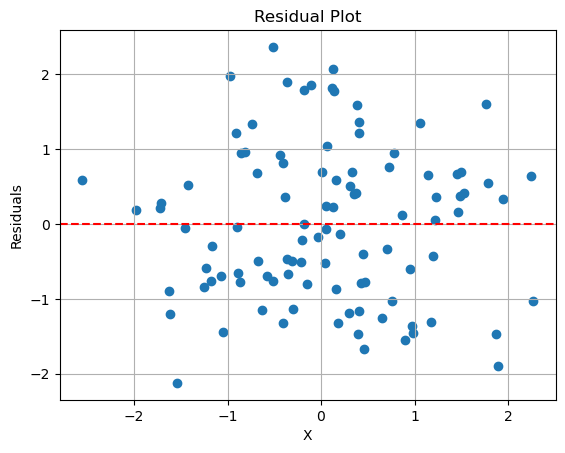

Rainbow test statistic: 1.4192070848949827
Rainbow test p-value: 0.11268019104585066


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.diagnostic import linear_rainbow

np.random.seed(0)

n = 100  
X = np.random.randn(n) 
epsilon = np.random.randn(n) 
beta = 2  
Y = 3 + beta*X + epsilon  


X = sm.add_constant(X) 
model = sm.OLS(Y, X)
results = model.fit()
predictions = results.predict(X)


residuals = Y - predictions


plt.scatter(X[:, 1], residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('X')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.grid(True)
plt.show()


rainbow_statistic, rainbow_p_value = linear_rainbow(results)
print(f'Rainbow test statistic: {rainbow_statistic}')
print(f'Rainbow test p-value: {rainbow_p_value}')


--------------------------------------------------------------------------------------------------------------------------------

# 3
Another method to test the linearity assumption is to include additional terms in the regression model that capture non-linear relationships, such as polynomial terms or interaction terms. By adding these terms and performing statistical tests (e.g., F-test or t-test), you can assess whether the non-linear terms significantly improve the model fit compared to the simpler linear model

In [8]:
np.random.seed(0)

n = 100
X = np.random.randn(n)
epsilon = np.random.randn(n)
beta = 2
Y = 3 + beta * X + epsilon


X_linear = sm.add_constant(X)  
model_linear = sm.OLS(Y, X_linear)
results_linear = model_linear.fit()
predictions_linear = results_linear.predict(X_linear)


X_poly = sm.add_constant(np.column_stack((X, X**2)))  
model_poly = sm.OLS(Y, X_poly)
results_poly = model_poly.fit()
predictions_poly = results_poly.predict(X_poly)


f_value = results_poly.compare_f_test(results_linear)
print(f'F-value: {f_value[0]}')
print(f'p-value: {f_value[1]}')


F-value: 0.6889864318302782
p-value: 0.40854757758201843


As we can see, adding a polynomial variable doesn't improve the model so the linear model performs better.

--------------------------------------------------------------------------------------------------------------------------------